In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [7]:
df = pd.read_csv("train.csv")

In [23]:
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Checking missing values 

In [29]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
missing_values_df = missing_values.to_frame("Missing Count")
missing_values_df

,Missing Count
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


In [ ]:
Several columns have missing values, with features like Alley, PoolQC, Fence, and MiscFeature having a high percentage of missing values.
LotFrontage, MasVnrType, and Garage-related features also contain missing values

In [ ]:
#summary dataset

In [30]:
numerical_summary = df.describe()
numerical_summary

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
the dataset contains a mix of numerical and categorical variables.
The target variable, SalePrice, has a mean of $180,921 with a standard deviation of $79,442.

In [ ]:
 #Target Variable Distribution (SalePrice)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

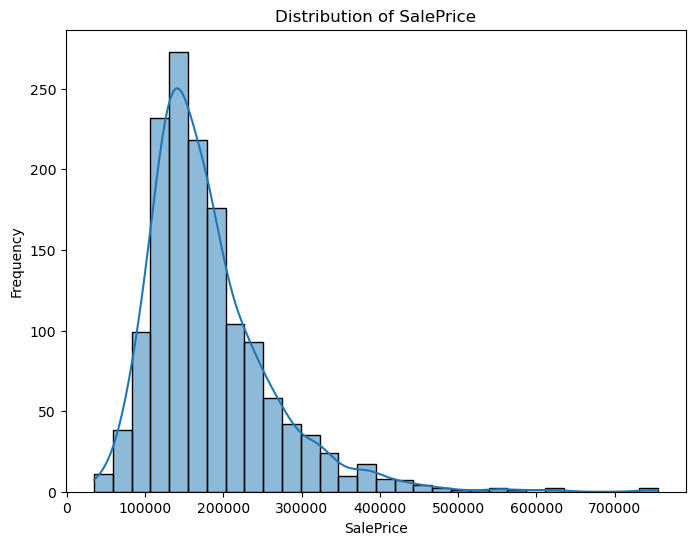

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df["SalePrice"], bins=30, kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Do correlation

In [36]:
correlation_matrix = df.corr(numeric_only=True)
top_corr_features = correlation_matrix["SalePrice"].sort_values(ascending=False)
top_corr_features_df = top_corr_features.to_frame("Correlation")

In [37]:
top_corr_features_df

,Correlation
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [ ]:
OverallQual, GrLivArea, and TotalBsmtSF strongly correlate with SalePrice, indicating that house quality, above-ground living area, and basement size significantly impact price.
Features like GarageCars and 1stFlrSF also show positive correlations with price.

In [ ]:
#Create the boxplot with SalesPrice vs Overall Quality

/var/folders/hk/tkn0l4v92h73_cxy0zk5gxv40000gp/T/ipykernel_19100/1754659454.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["OverallQual"], y=df["SalePrice"], palette="coolwarm")


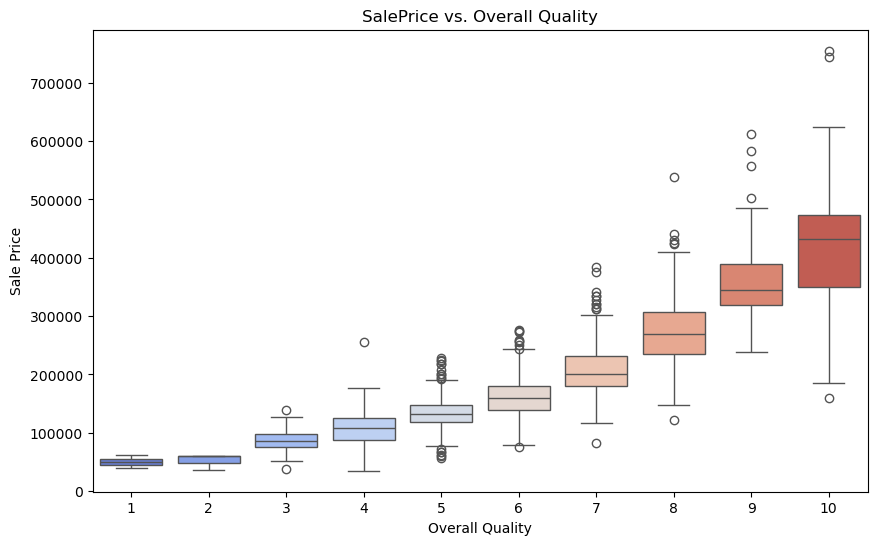

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["OverallQual"], y=df["SalePrice"], palette="coolwarm")
plt.title("SalePrice vs. Overall Quality")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()

In [ ]:
Higher overall quality (OverallQual) leads to significantly higher house prices. The trend is clear, showing a positive correlation

In [ ]:
# Create the scatter plot for the SalePrice vs. GrLivArea:

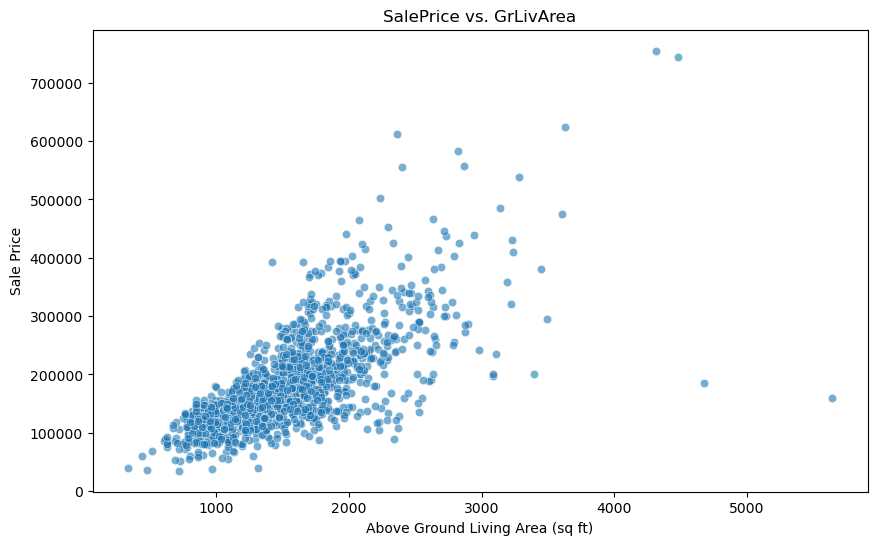

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["GrLivArea"], y=df["SalePrice"], alpha=0.6)
plt.title("SalePrice vs. GrLivArea")
plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.show()

In [ ]:
As the Scatterplot we can see that the correlation goes to the right that mean there is a strong positive correlation between Abover Ground Living Area and Sale Price, with a few outliter some large house prices are much lower 
 

In [ ]:
# Countplot of Neighboorhood

/var/folders/hk/tkn0l4v92h73_cxy0zk5gxv40000gp/T/ipykernel_19100/31277157.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Neighborhood"], order=df["Neighborhood"].value_counts().index, palette="viridis")


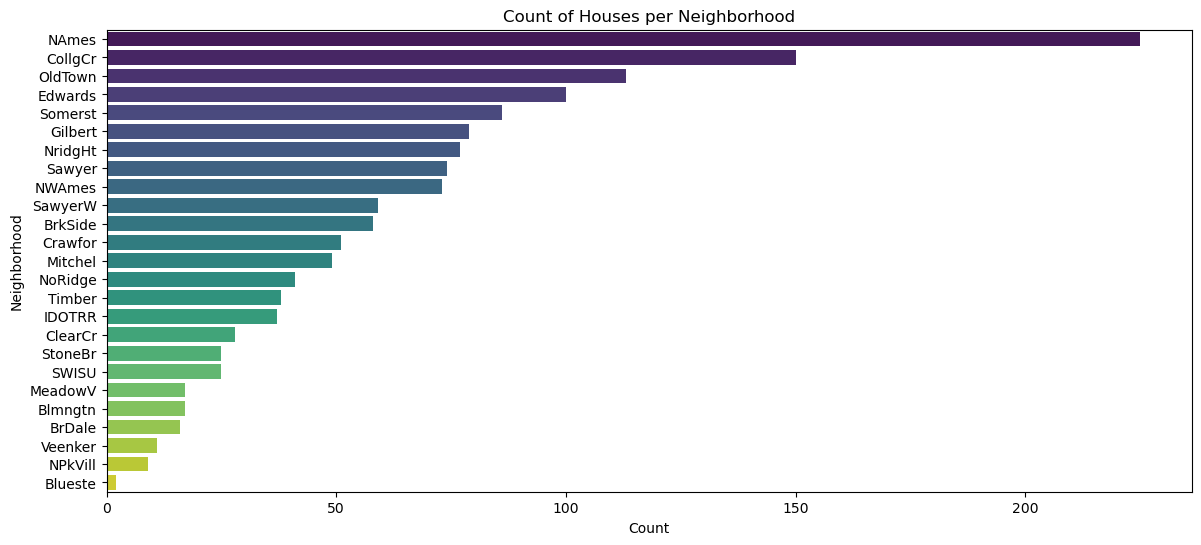

In [36]:
plt.figure(figsize=(14, 6))
sns.countplot(y=df["Neighborhood"], order=df["Neighborhood"].value_counts().index, palette="viridis")
plt.title("Count of Houses per Neighborhood")
plt.xlabel("Count")
plt.ylabel("Neighborhood")
plt.show()

In [ ]:
Some neighborhoods have significantly more houses in the dataset, which could impact price predictions or location-based analysis.